In [1]:
import os
import pandas as pd
from tqdm import tqdm
import cv2

from time import time
from PIL import Image

import numpy as np

In [2]:
def overlay_roads(target_path, predict_path):
    ground_truth_path = os.path.join(target_path)
    ground_truth = np.array(cv2.imread(ground_truth_path))[:, :, 1]

    ground_truth = cv2.resize(ground_truth, dsize=(1024, 1024))
    
    predict_path = os.path.join(predict_path)
    predict = np.array(cv2.imread(predict_path))[:, :, 1]

    predict = cv2.resize(predict, dsize=(1024, 1024))
    
    gt = np.zeros(shape=np.shape(ground_truth))
    gt[ground_truth > 0] = 1

    predi_mask = np.zeros(shape=np.shape(predict))
    predi_mask[predict > 20] = 1
    
    gt = gt.astype(np.uint8)
    predi_mask = predi_mask.astype(np.uint8)
    
    kosong = np.zeros((1024,1024,3), dtype=np.uint8)

    for i in range(1024):
        for j in range(1024):
            if gt[i][j] == 1:
                if predi_mask[i][j] == 1:
                    kosong[i,j,0] = 255
                    kosong[i,j,1] = 255
                    kosong[i,j,2] = 255
                elif predi_mask[i][j] == 0:
                    # red color
                    kosong[i,j,0] = 255
            elif gt[i][j] == 0:
                if predi_mask[i][j] == 1:
                    # blue color
                    kosong[i,j,2] = 255
    
    return kosong

In [21]:
gt_path = "../massachusetts-roads-dataset/tiff/test/masks/15928855_15.tif"

pred_path = "Evaluation/submits/RCFSNet_ConvNeXt_Tiny_Mas_ep100_double_pos_03/15928855_15mask.png"

ret_overlay = overlay_roads(gt_path, pred_path)

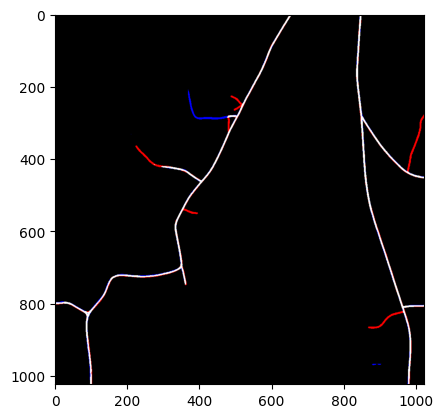

In [22]:
import matplotlib.pyplot as plt

plt.imshow(ret_overlay)

In [23]:
overlay_rgb = cv2.cvtColor(ret_overlay, cv2.COLOR_BGR2RGB)

cv2.imwrite('overlay_gt_pred_ex.png', overlay_rgb)

True